## **1. Install and Import Libraries** 


In [1]:
!pip install neuralprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import pandas as pd
from matplotlib import pyplot
from matplotlib.pyplot import figure
import plotly.express as px
from prophet import Prophet


## **2. Explore Dataset**



In [3]:
data = pd.read_csv("weather-sa-2017-2019-clean.csv") #Load Data
data.head(10)

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
5,5,Qassim,1 January 2017,06:00,2017,1,1,6,0,Clear,13,13,82%,1019.0,16
6,6,Qassim,1 January 2017,07:00,2017,1,1,7,0,Sunny,12,7,88%,1019.0,16
7,7,Qassim,1 January 2017,08:00,2017,1,1,8,0,Sunny,14,9,72%,1021.0,16
8,8,Qassim,1 January 2017,09:00,2017,1,1,9,0,Sunny,15,9,72%,1021.0,7
9,9,Qassim,1 January 2017,10:00,2017,1,1,10,0,Sunny,17,7,64%,1021.0,9


In [4]:
# data types
data.dtypes

Unnamed: 0      int64
city           object
date           object
time           object
year            int64
month           int64
day             int64
hour            int64
minute          int64
weather        object
temp            int64
wind            int64
humidity       object
barometer     float64
visibility      int64
dtype: object

In [5]:
data.columns

Index(['Unnamed: 0', 'city', 'date', 'time', 'year', 'month', 'day', 'hour',
       'minute', 'weather', 'temp', 'wind', 'humidity', 'barometer',
       'visibility'],
      dtype='object')

In [6]:
data['city'].value_counts()

Jawf                20352
Mecca               20268
Tabuk               20240
Northern boarder    20235
Hail                20121
Madina              19965
Baha                19959
Najran              19847
Jazan               19829
Qassim              19793
EP                  18505
Riyadh              16421
Assir               13488
Name: city, dtype: int64

In [7]:
data.isnull().sum()

Unnamed: 0     0
city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [8]:
data = data.dropna(subset=['humidity', 'barometer'])


In [9]:
data.duplicated().sum()


0

In [10]:
data['ds'] = data['date']
data['y'] = data['temp']
data.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility,ds,y
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16,1 January 2017,17
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16,1 January 2017,17
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16,1 January 2017,15
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16,1 January 2017,15
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16,1 January 2017,15


In [12]:
data.drop(['date', 'temp','Unnamed: 0'], axis=1)


,city,time,year,month,day,hour,minute,weather,wind,humidity,barometer,visibility,ds,y
0,Qassim,00:00,2017,1,1,24,0,Clear,11,64%,1018.0,16,1 January 2017,17
1,Qassim,01:00,2017,1,1,1,0,Clear,6,64%,1018.0,16,1 January 2017,17
2,Qassim,03:00,2017,1,1,3,0,Clear,11,72%,1019.0,16,1 January 2017,15
3,Qassim,04:00,2017,1,1,4,0,Clear,11,72%,1019.0,16,1 January 2017,15
4,Qassim,05:00,2017,1,1,5,0,Clear,9,72%,1019.0,16,1 January 2017,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,Jawf,19:00,2019,4,30,19,0,Passing clouds,19,14%,1014.0,-1,30 April 2019,32
249019,Jawf,20:00,2019,4,30,20,0,Passing clouds,9,22%,1015.0,-1,30 April 2019,29
249020,Jawf,21:00,2019,4,30,21,0,Passing clouds,7,24%,1016.0,-1,30 April 2019,27
249021,Jawf,22:00,2019,4,30,22,0,Clear,0,26%,1017.0,16,30 April 2019,26


In [14]:
data['ds'] = pd.to_datetime(data['ds']) # Convert Date


In [18]:
data.shape

(248946, 17)

In [22]:
data=data[['ds','y']] #expected column


In [23]:
print(data.shape) 


(248946, 2)


In [24]:
data=data.groupby('ds',as_index=False).mean()
print(data.head())

          ds          y
0 2017-01-01  16.789286
1 2017-01-02  16.628159
2 2017-01-03  15.558394
3 2017-01-04  15.084806
4 2017-01-05  14.494585


In [25]:
print(data.shape) 


(850, 2)


In [26]:
fig = px.line(data, x='ds', y='y')
fig.show()

## **3. Train Model**

In [28]:
model=Prophet() #Define The Model 

In [29]:
model.fit(data)# Fit The Model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz63z8nsp/zwvaoexv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz63z8nsp/5v0h18jt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10928', 'data', 'file=/tmp/tmpz63z8nsp/zwvaoexv.json', 'init=/tmp/tmpz63z8nsp/5v0h18jt.json', 'output', 'file=/tmp/tmpz63z8nsp/prophet_model8s19y_15/prophet_model-20230325212107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:21:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## **4. Forecast**

In [37]:
future = model.make_future_dataframe( periods=1500) 
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,24.180060,13.299554,17.049581,24.180060,24.180060,-8.989704,-8.989704,-8.989704,-0.094972,-0.094972,-0.094972,-8.894732,-8.894732,-8.894732,0.0,0.0,0.0,15.190356
1,2017-01-02,24.190319,13.218441,17.070813,24.190319,24.190319,-8.982764,-8.982764,-8.982764,-0.068695,-0.068695,-0.068695,-8.914069,-8.914069,-8.914069,0.0,0.0,0.0,15.207555
2,2017-01-03,24.200579,13.224915,16.962876,24.200579,24.200579,-8.992055,-8.992055,-8.992055,-0.054948,-0.054948,-0.054948,-8.937107,-8.937107,-8.937107,0.0,0.0,0.0,15.208524
3,2017-01-04,24.210838,13.509499,17.238737,24.210838,24.210838,-8.894120,-8.894120,-8.894120,0.069284,0.069284,0.069284,-8.963404,-8.963404,-8.963404,0.0,0.0,0.0,15.316717
4,2017-01-05,24.221097,13.574172,17.327317,24.221097,24.221097,-8.804718,-8.804718,-8.804718,0.187652,0.187652,0.187652,-8.992370,-8.992370,-8.992370,0.0,0.0,0.0,15.416379


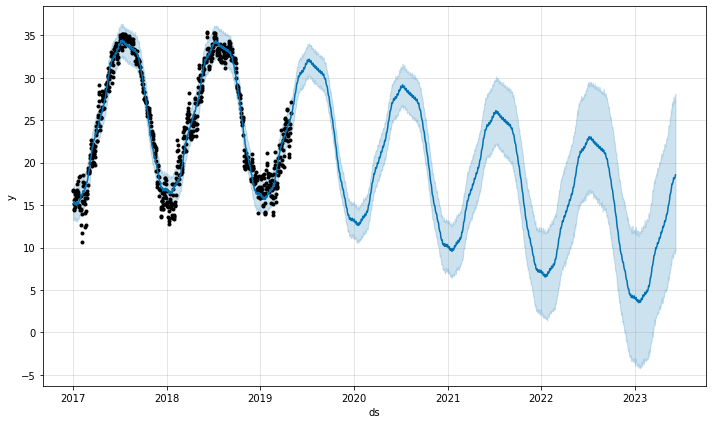

In [42]:
fig1 = model.plot(forecast) #plot forecast

pyplot.show()

#As we see [the black dot ] represents values of our time series ,[the blue line ] represents forecasted values (yhat value) and the uncertainty intervals of our forecasts (the blue shaded area).

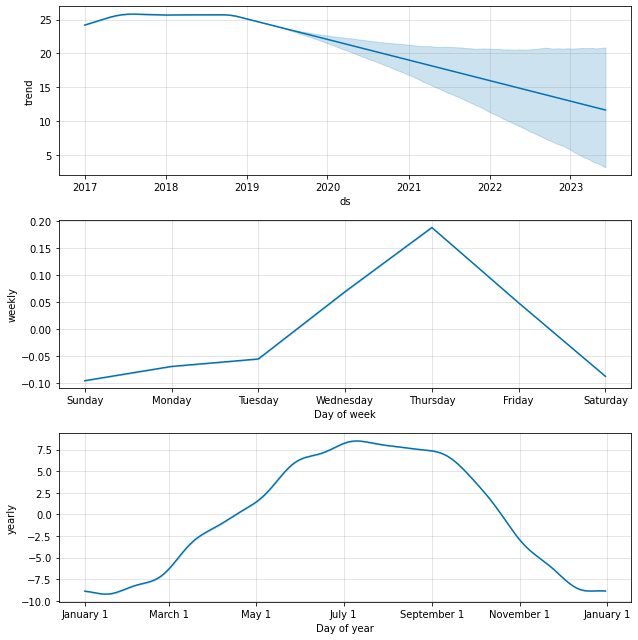

In [39]:
fig2 = model.plot_components(forecast)
